# Multiple Linear Regression

In [1]:
# Ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

Step 1 - Perform Data Ingestion

In [3]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Step 2 - Perform Basic Data quality checks

In [4]:
df.shape

(50, 5)

In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Step 3 - Seperate X and Y(PROFIT)

In [8]:
X = df.drop(columns=["STATE", "PROFIT"])
Y = df["PROFIT"]

In [9]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [10]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

PROFIT = B0 + B1 x RND + B2 x ADMIN + B3 x MKT

Step 4 - Fit the straight line

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [12]:
model.intercept_

50122.19298986524

In [13]:
model.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [14]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [15]:
coef = pd.Series(model.coef_, index=X.columns)
coef[0:5]

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: >

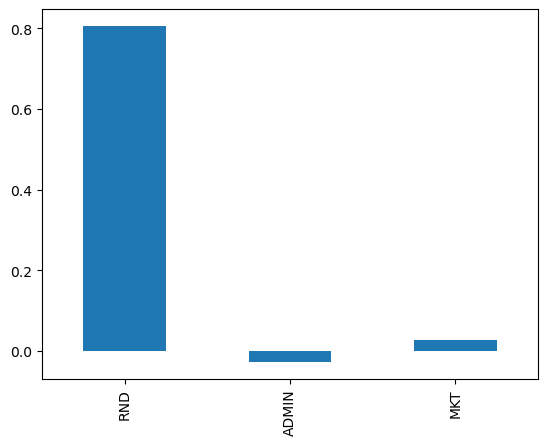

In [16]:
coef.plot(kind="bar")

Profit_pred = 50122.19 + 0.8057xRND - 0.026xADMIN + 0.027xMKT

Step 5 - Evaluate the model

In [18]:
# R2 score
model.score(X, Y)

0.9507459940683246

In [19]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [20]:
evaluate_model(model, X, Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


Step 6 - Predict the results for Out of Sample Data

In [21]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [22]:
rnd = 70_000
mkt = 90_000
admin = 1_50_000

xnew = [[rnd, admin, mkt]]
profit = model.predict(xnew)
print(profit)

[104950.37705683]
